# Objetivo:

1)Mostre médias, medianas, modas e desvio padrão

2)Mostre números mínimos e máximos, de pelo menos duas variáveis, e suas amplitudes

3)Pelo menos dois gráficos de Barras

4)Pelo menos dois gráficos de Linhas

5)Pelo menos dois gráficos Blox Pot

6)Pelo menos dois gráficos de Correlação

Para cada item acima justifique as informações escolhidas e explique os resultados obtidos
(considerando os conceitos discutidos em sala de aula).



**Precisamos definir dados a serem analisados** <br />
Enquanto eles não foram definidos pela equipe, comecei a fazer uma análise para verificar se a relação entre alunos ingressantes x concluintes é diferente nas regiões do Brasil. 
<br /> **Sugestões de dados a serem analisados:::::** <br />



In [275]:
# Funções para visualização dos dados

from matplotlib import pyplot as plt
import numpy as np

def generate_bar_graph(title, x, y, xlabel,ylabel):
    plt.bar(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def generate_many_line_graph(title, x, y, z, xlabel, ylabel):
    plt.plot(x, y, color="green", marker="o", linestyle='solid')
    plt.plot(x, z, color="blue", marker="o", linestyle='solid')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
def generate_line_graph(title, x, y, xlabel, ylabel):
    plt.plot(x, y, color="green", marker="o", linestyle='solid')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def get_media(array):
    return np.mean(array)

def get_median(array):
    return np.median(array)

def get_mode(array):
    return np.bincount(array).argmax()

def plota_barra_linha(title, x, y, z, xlabel, ylabel):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.bar(x, y, color="black", align='center')                 
    plt.plot(x, z, color="green", marker='o', linestyle='--', linewidth=2)
    plt.show()  

In [276]:
import unicodecsv

#Aqui são abertos os arquivos de matriculas e concluintes e transformados em uma lista de dicionarios, cada um

ingressantes_filename = 'dados/ingressantes.dll'
concluintes_filename = 'dados/concluintes.dll'


def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
    
ingressantes = read_csv(ingressantes_filename)
concluintes = read_csv(concluintes_filename)
    

In [277]:
# Organizando os dados

# Arrumando os tipos de dados e apagando colunas repetidas ou cujo valor vai ser sempre 0

for c in concluintes:
    c['Número de Concluintes'] = int(c['Número de Concluintes'])
    c['Ano Censo'] = c['\ufeffAno Censo']
    del c['\ufeffAno Censo'] 
    del c['Região - Região'] 
    del c['UF - Curso']
    del c['Id Categoria Administrativa']

for index, c in enumerate(concluintes):
    if(c['UF'] == "-"):
        del concluintes[index]
        

for i in ingressantes:
    i['Número de Ingressos'] = int(i['Número de Ingressos'])
    i['Ano Censo'] = i['\ufeffAno Censo']
    del i['\ufeffAno Censo']
    del i['Id Categoria Administrativa']
    

estados = []
for concluinte in concluintes:
    if(concluinte['UF'] not in estados):
        estados.append(concluinte['UF'])
estados.sort()
estados

['ACRE',
 'ALAGOAS',
 'AMAPÁ',
 'AMAZONAS',
 'BAHIA',
 'CEARÁ',
 'DISTRITO FEDERAL',
 'ESPÍRITO SANTO',
 'GOIÁS',
 'MARANHÃO',
 'MATO GROSSO',
 'MATO GROSSO DO SUL',
 'MINAS GERAIS',
 'PARANÁ',
 'PARAÍBA',
 'PARÁ',
 'PERNAMBUCO',
 'PIAUÍ',
 'RIO DE JANEIRO',
 'RIO GRANDE DO NORTE',
 'RIO GRANDE DO SUL',
 'RONDÔNIA',
 'RORAIMA',
 'SANTA CATARINA',
 'SERGIPE',
 'SÃO PAULO',
 'TOCANTINS']

In [281]:
#Obtendo dicionarios do número de concluintes em escolas públicas, priv
concluintes_publica_num = {}
concluintes_privada_num = {}
concluintes_total = {}

for e in estados:
    concluintes_publica_num[e] = 0
    concluintes_privada_num[e]= 0
    concluintes_total[e] = 0

for concluinte in concluintes:
    estado = concluinte['UF']
    tipo = concluinte['Categoria Administrativa']
    if(tipo == 'PÚBLICA'):
        concluintes_publica_num[estado] += concluinte['Número de Concluintes']
    elif(tipo == 'PRIVADA'):
        concluintes_privada_num[estado] += concluinte['Número de Concluintes']
    concluintes_total[estado] += concluinte['Número de Concluintes']


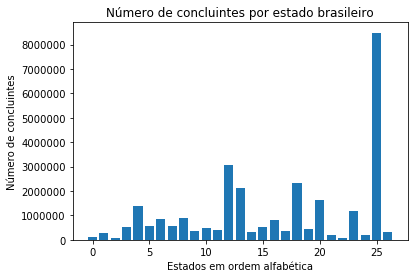

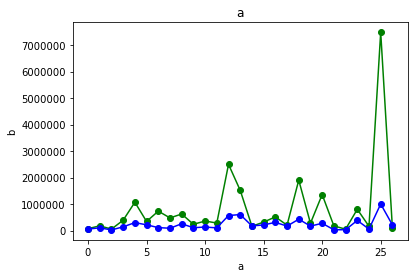

In [279]:
#Visualização dos dados gerados acima
generate_bar_graph("Número de concluintes por estado brasileiro", range(27), list(concluintes_total.values()), "Estados em ordem alfabética", "Número de concluintes")
generate_many_line_graph("a", range(27), list(concluintes_privada_num.values()), list(concluintes_publica_num.values()), "a", "b")

In [273]:
plota_barra_linha("Relação de concluintes em escolas públicas x privadas", range(28), list(concluintes_publica_num.values()), list(concluintes_privada_num.values()), "Estados em ordem alfabética", "Número de concluintes")

ValueError: incompatible sizes: argument 'height' must be length 28 or scalar

In [ ]:
anos = []
for c in concluintes:
    if(c['Ano Censo'] not in anos):
        anos.append(c['Ano Censo'])
anos.sort()

concluintes_por_ano = {}
ingressantes_por_ano = {}

for a in anos:
    concluintes_por_ano[a] = 0
    ingressantes_por_ano[a] = 0

for concluinte in concluintes:
    ano = concluinte['Ano Censo']
    concluintes_por_ano[ano] += concluinte['Número de Concluintes']

for ingressante in ingressantes:
    ano = ingressante['Ano Censo']
    ingressantes_por_ano[ano] += ingressante['Número de Ingressos']


ingressantes_por_ano



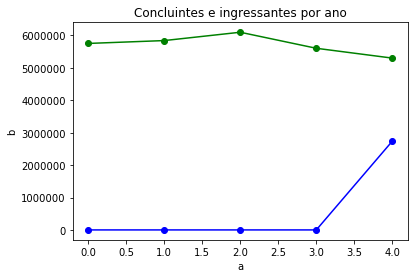

In [274]:
generate_many_line_graph("Concluintes e ingressantes por ano", range(len(anos)), list(concluintes_por_ano.values()), list(ingressantes_por_ano.values()), "a", "b")